# ENSEMBLE LEARNING - Random Forest

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')


from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier



### Example-1 IRIS

In [3]:
iris = pd.read_csv("data/Iris.csv")
iris = iris.drop("Id", axis=1)
iris = iris.rename(columns={"species": "label"})

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 2794)

##### Logistic Regression

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
print("Training Accuracy:", np.round(accuracy_score(y_train, y_pred_train),2))
print("Test Accuracy:", np.round(accuracy_score(y_test, y_pred_test),2))

Training Accuracy: 0.97
Test Accuracy: 0.93


In [9]:
print("Confusion Matrix-Test Dataset:::")
print("--------------------------------")
confusion_matrix(y_test, y_pred_test)

Confusion Matrix-Test Dataset:::
--------------------------------


array([[ 9,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 11]])

In [10]:
pd.Series(y_test).value_counts()

Iris-virginica     11
Iris-versicolor    10
Iris-setosa         9
dtype: int64

##### Decision Tree

In [11]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_train = dec_tree.predict(X_train)
y_pred_test = dec_tree.predict(X_test)

In [12]:
print("Training Accuracy:", np.round(accuracy_score(y_train, y_pred_train),2))
print("Test Accuracy:", np.round(accuracy_score(y_test, y_pred_test),2))

Training Accuracy: 1.0
Test Accuracy: 0.93


In [13]:
print("Confusion Matrix-Test Dataset:::")
print("--------------------------------")
confusion_matrix(y_test, y_pred_test)

Confusion Matrix-Test Dataset:::
--------------------------------


array([[ 9,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 11]])

/usr/local/anaconda/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


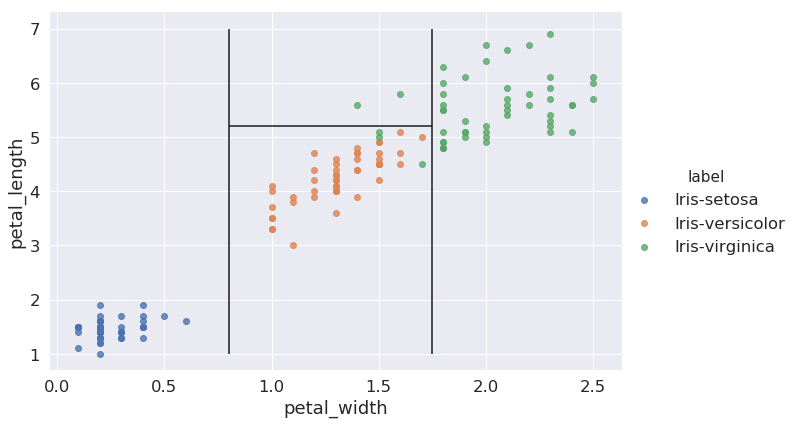

In [14]:
sns.lmplot(data=iris, x = 'petal_width', y='petal_length', hue='label', 
           fit_reg=False, size = 6,  aspect = 1.5);
plt.vlines(x=0.8, ymin=1, ymax=7);
plt.vlines(x=1.75, ymin=1, ymax=7);
plt.hlines(y=5.2, xmin=0.8, xmax=1.75);


### Example-2 Housing Price

In [15]:
df = pd.read_excel("data/HousingPrice.xls")
df.head()

,Order,PID,MS Zoning,Lot Area,Lot Shape,Utilities,Condition 1,Condition 2,Bldg Type,House Style,...,Year Built,Year Remod/Add,Foundation,Bsmt Qual,Central Air,F_Flr,S_Flr,Kitchen Qual,Yr Sold,Sale_Price
0,1,526301100,RL,31770,IR1,AllPub,Norm,Norm,1Fam,1Story,...,1960,1960,CBlock,TA,Y,1656,0,TA,2010,215000
1,2,526350040,RH,11622,Reg,AllPub,Feedr,Norm,1Fam,1Story,...,1961,1961,CBlock,TA,Y,896,0,TA,2010,105000
2,3,526351010,RL,14267,IR1,AllPub,Norm,Norm,1Fam,1Story,...,1958,1958,CBlock,TA,Y,1329,0,Gd,2010,172000
3,4,526353030,RL,11160,Reg,AllPub,Norm,Norm,1Fam,1Story,...,1968,1968,CBlock,TA,Y,2110,0,Ex,2010,244000
4,5,527105010,RL,13830,IR1,AllPub,Norm,Norm,1Fam,2Story,...,1997,1998,PConc,Gd,Y,928,701,TA,2010,189900


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
Order             2930 non-null int64
PID               2930 non-null int64
MS Zoning         2930 non-null object
Lot Area          2930 non-null int64
Lot Shape         2930 non-null object
Utilities         2930 non-null object
Condition 1       2930 non-null object
Condition 2       2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Foundation        2930 non-null object
Bsmt Qual         2850 non-null object
Central Air       2930 non-null object
F_Flr             2930 non-null int64
S_Flr             2930 non-null int64
Kitchen Qual      2930 non-null object
Yr Sold           2930 non-null int64
Sale_Price        2930 non-null int64
dtypes: int64(11), object(11)
memory usage: 50

In [17]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace(')', '')
df.columns

Index(['order', 'pid', 'ms_zoning', 'lot_area', 'lot_shape', 'utilities',
       'condition_1', 'condition_2', 'bldg_type', 'house_style',
       'overall_qual', 'overall_cond', 'year_built', 'year_remod_add',
       'foundation', 'bsmt_qual', 'central_air', 'f_flr', 's_flr',
       'kitchen_qual', 'yr_sold', 'sale_price'],
      dtype='object')

In [18]:
df.set_index('pid', inplace=True)  ### Setting Index 
df.drop('order', axis =1, inplace=True) ### Dropping Unneccessary column
df.dropna(inplace=True) ### Dropping Missing Values

In [19]:
df.columns

Index(['ms_zoning', 'lot_area', 'lot_shape', 'utilities', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'foundation',
       'bsmt_qual', 'central_air', 'f_flr', 's_flr', 'kitchen_qual', 'yr_sold',
       'sale_price'],
      dtype='object')

In [20]:
df = pd.get_dummies(df)
df.columns

Index(['lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'f_flr', 's_flr', 'yr_sold', 'sale_price',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'lot_shape_IR1',
       'lot_shape_IR2', 'lot_shape_IR3', 'lot_shape_Reg', 'utilities_AllPub',
       'utilities_NoSeWa', 'utilities_NoSewr', 'condition_1_Artery',
       'condition_1_Feedr', 'condition_1_Norm', 'condition_1_PosA',
       'condition_1_PosN', 'condition_1_RRAe', 'condition_1_RRAn',
       'condition_1_RRNe', 'condition_1_RRNn', 'condition_2_Artery',
       'condition_2_Feedr', 'condition_2_Norm', 'condition_2_PosA',
       'condition_2_PosN', 'condition_2_RRAe', 'condition_2_RRAn',
       'condition_2_RRNn', 'bldg_type_1Fam', 'bldg_type_2fmCon',
       'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE',
       'house_style_1.5Fin', 'house_style_1.5Unf', 'house_style_1Story',
       'house_style_2.5Fin', 'house_styl

In [21]:
column_order = ['lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'f_flr', 's_flr', 'yr_sold', 
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'lot_shape_IR1',
       'lot_shape_IR2', 'lot_shape_IR3', 'lot_shape_Reg', 'utilities_AllPub',
       'utilities_NoSeWa', 'utilities_NoSewr', 'condition_1_Artery',
       'condition_1_Feedr', 'condition_1_Norm', 'condition_1_PosA',
       'condition_1_PosN', 'condition_1_RRAe', 'condition_1_RRAn',
       'condition_1_RRNe', 'condition_1_RRNn', 'condition_2_Artery',
       'condition_2_Feedr', 'condition_2_Norm', 'condition_2_PosA',
       'condition_2_PosN', 'condition_2_RRAe', 'condition_2_RRAn',
       'condition_2_RRNn', 'bldg_type_1Fam', 'bldg_type_2fmCon',
       'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE',
       'house_style_1.5Fin', 'house_style_1.5Unf', 'house_style_1Story',
       'house_style_2.5Fin', 'house_style_2.5Unf', 'house_style_2Story',
       'house_style_SFoyer', 'house_style_SLvl', 'foundation_BrkTil',
       'foundation_CBlock', 'foundation_PConc', 'foundation_Stone',
       'foundation_Wood', 'bsmt_qual_Ex', 'bsmt_qual_Fa', 'bsmt_qual_Gd',
       'bsmt_qual_Po', 'bsmt_qual_TA', 'central_air_N', 'central_air_Y',
       'kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd',
       'kitchen_qual_Po', 'kitchen_qual_TA', 'sale_price']

In [22]:
df = df[column_order]
df.head()

,lot_area,overall_qual,overall_cond,year_built,year_remod_add,f_flr,s_flr,yr_sold,ms_zoning_C (all),ms_zoning_FV,...,bsmt_qual_Po,bsmt_qual_TA,central_air_N,central_air_Y,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA,sale_price
pid,,,,,,,,,,,,,,,,,,,,,
526301100,31770,6,5,1960,1960,1656,0,2010,0,0,...,0,1,0,1,0,0,0,0,1,215000
526350040,11622,5,6,1961,1961,896,0,2010,0,0,...,0,1,0,1,0,0,0,0,1,105000
526351010,14267,6,6,1958,1958,1329,0,2010,0,0,...,0,1,0,1,0,0,1,0,0,172000
526353030,11160,7,5,1968,1968,2110,0,2010,0,0,...,0,1,0,1,1,0,0,0,0,244000
527105010,13830,5,5,1997,1998,928,701,2010,0,0,...,0,0,0,1,0,0,0,0,1,189900


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 526301100 to 924151050
Data columns (total 69 columns):
lot_area              2850 non-null int64
overall_qual          2850 non-null int64
overall_cond          2850 non-null int64
year_built            2850 non-null int64
year_remod_add        2850 non-null int64
f_flr                 2850 non-null int64
s_flr                 2850 non-null int64
yr_sold               2850 non-null int64
ms_zoning_C (all)     2850 non-null uint8
ms_zoning_FV          2850 non-null uint8
ms_zoning_I (all)     2850 non-null uint8
ms_zoning_RH          2850 non-null uint8
ms_zoning_RL          2850 non-null uint8
ms_zoning_RM          2850 non-null uint8
lot_shape_IR1         2850 non-null uint8
lot_shape_IR2         2850 non-null uint8
lot_shape_IR3         2850 non-null uint8
lot_shape_Reg         2850 non-null uint8
utilities_AllPub      2850 non-null uint8
utilities_NoSeWa      2850 non-null uint8
utilities_NoSewr      2850 non-null uint

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2794)

In [27]:
X_test.shape

(713, 68)

In [28]:
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("Training Accuracy:", np.round(r2_score(y_train, y_pred_train),2))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

print("Test Accuracy:", np.round(r2_score(y_test, y_pred_test),2))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Training Accuracy: 0.84
Training RMSE: 31325.938445358966
Test Accuracy: 0.85
Test RMSE: 31586.471993737185


In [29]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
y_pred_train = dec_tree.predict(X_train)
y_pred_test = dec_tree.predict(X_test)
print("Training Accuracy:", np.round(r2_score(y_train, y_pred_train),2))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

print("Test Accuracy:", np.round(r2_score(y_test, y_pred_test),2))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Training Accuracy: 1.0
Training RMSE: 182.45994767791979
Test Accuracy: 0.79
Test RMSE: 37894.17520732914


### Bias-Variance Tradeoff
![](img/bias1.png)
![](img/bias2.png)
-----------------------------------
### So Decision Tree is WOT ???
![](img/think.png)

In [30]:
dec_tree = DecisionTreeRegressor(max_depth=5, min_samples_split= 5)
dec_tree.fit(X_train, y_train)
y_pred_train = dec_tree.predict(X_train)
y_pred_test = dec_tree.predict(X_test)
print("Training Accuracy:", np.round(r2_score(y_train, y_pred_train),2))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

print("Test Accuracy:", np.round(r2_score(y_test, y_pred_test),2))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Training Accuracy: 0.84
Training RMSE: 31978.531740971983
Test Accuracy: 0.77
Test RMSE: 39370.17422168971


# Here comes the handy Ensemble Learning

#### 1) Bagging (Ex. Random Forest)
![](img/bagging.png)
#### 2) Boosting (Ex. Gradient Boosting)
![](img/boosting.png)
#### 3) Stacking
![](img/stacking.png)

## Random Forest
![](img/rf1.jpg)
------------------------------------
![](img/rf2.png)

In [31]:
rf = RandomForestRegressor(n_estimators=1)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Training Accuracy:", np.round(r2_score(y_train, y_pred_train),2))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

print("Test Accuracy:", np.round(r2_score(y_test, y_pred_test),2))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Training Accuracy: 0.92
Training RMSE: 22499.531703211687
Test Accuracy: 0.77
Test RMSE: 39627.99027572718


In [32]:
RandomForestRegressor?

In [33]:
rf = RandomForestRegressor(n_estimators = 100, max_depth =9, random_state = 50, 
                           max_features=.60)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Training Accuracy:", np.round(r2_score(y_train, y_pred_train),2))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

print("Test Accuracy:", np.round(r2_score(y_test, y_pred_test),2))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Training Accuracy: 0.96
Training RMSE: 16061.537183225115
Test Accuracy: 0.87
Test RMSE: 29120.546913209906


In [34]:
rf.feature_importances_

array([5.68712963e-02, 4.44840820e-01, 8.10238370e-03, 1.09978514e-01,
       1.31268843e-02, 1.32638416e-01, 5.95140816e-02, 4.29536374e-03,
       2.31030781e-04, 4.32576930e-04, 1.46353215e-05, 8.30985392e-05,
       3.65669386e-03, 3.49984430e-03, 1.32587814e-03, 8.99445202e-04,
       8.11982412e-04, 1.36297207e-03, 6.35780314e-05, 5.25179950e-08,
       9.35176120e-06, 1.83161730e-04, 2.65687575e-04, 6.96912091e-04,
       4.36004195e-04, 5.04053341e-04, 4.07877313e-05, 4.37270469e-05,
       1.28847011e-06, 7.32705885e-05, 1.08905419e-07, 9.52282780e-06,
       3.19830626e-04, 2.06528147e-04, 5.91380695e-04, 0.00000000e+00,
       0.00000000e+00, 1.68788209e-06, 1.78083443e-03, 4.17824710e-05,
       3.82810767e-04, 1.38877524e-04, 5.93177017e-04, 5.60584453e-04,
       4.16587139e-06, 2.36850412e-03, 7.63452849e-05, 5.94887718e-04,
       4.31651834e-03, 2.18513129e-05, 1.33022369e-04, 6.20030602e-04,
       6.51312428e-04, 4.17202414e-03, 1.49871409e-05, 5.73479657e-05,
      

##### Hyper Parameter Tuning

In [35]:
param_grid = {'n_estimators': [10, 50, 75, 90, 100],
'max_depth': [1, 3, 5, 7, 9], 'max_features': [.40, .50, .60, 'sqrt', 'log2']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [10, 50, 75, 90, 100], 'max_depth': [1, 3, 5, 7, 9], 'max_features': [0.4, 0.5, 0.6, 'sqrt', 'log2']}


In [ ]:
# grid_search = GridSearchCV(RandomForestRegressor(random_state = 50, n_jobs = -1), param_grid)
# grid_search.fit(X_train, y_train)
# print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
# print("Best parameters: {}".format(grid_search.best_params_))


In [ ]:
# y_pred_train = grid_search.predict(X_train)
# y_pred_test = grid_search.predict(X_test)
# print("Training Accuracy:", np.round(r2_score(y_train, y_pred_train),2))
# print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

# print("Test Accuracy:", np.round(r2_score(y_test, y_pred_test),2))
# print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

### Out of Bag (OOB) Score

In [36]:
rf = RandomForestRegressor(n_estimators = 100, max_depth =9, random_state = 50, 
                           max_features=.60, oob_score = True)
rf.fit(X, y)
y_pred = rf.predict(X)
y_pred_oob = rf.oob_prediction_
print("Training Accuracy:", np.round(r2_score(y, y_pred),2))
print("Training RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

print("OOB Accuracy:", np.round(r2_score(y, y_pred_oob),2))
print("OOB RMSE:", np.sqrt(mean_squared_error(y, y_pred_oob)))

print("OOB Accuracy:", np.round(rf.oob_score_, 2))

Training Accuracy: 0.96
Training RMSE: 16842.773595408056
OOB Accuracy: 0.88
OOB RMSE: 27799.740643856127
OOB Accuracy: 0.88
